In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
def get_base_filepath():
    '''
    Access the filepath for the base folder of the project
    
    Input: None
    
    Output: The filepath to the root of the folder
    '''
    # Get current directory
    os.path.abspath(os.curdir)

    # Go up a directory level
    os.chdir('..')

    # Set baseline filepath to the project folder directory
    base_folder_filepath = os.path.abspath(os.curdir)
    return base_folder_filepath

In [3]:
def extract_features(filepath):
    '''
    Create a dataframe using the mean of regions over time.
    
    Input: filepath to open the dataframe
    
    Output: dataframe of mean for each region
    '''
    # Read the filepath as a dataframe (use 1 tab as separator and the first line as the header)
    df = pd.read_csv(filepath, sep=r'\s{1,}', engine='python', header=0)
    
    # Drop two features that get in the way of evaluation
    df = df.drop('File', axis=1)
    df = df.drop('Sub-brick', axis=1)
    
    # Return the mean for each of the features (method of vectorizing)
    return df.mean()

In [4]:
base_folder_filepath = get_base_filepath()
ohsu_filepath = base_folder_filepath +  '\\Data\\Preprocessed_data\\Sites\\OHSU\\'
phenotypics_filepath = base_folder_filepath + '\\Data\\Phenotypic\\Sites\\OHSU_phenotypic.csv'

In [5]:
subjects = []
subject_features = []

# Access all sfnwmrda files in the OHSU folder
# Access the patient folders within the site folder
for patient_id_folder in os.listdir(ohsu_filepath):
    # Access the filepath to the folder
    patient_id_folder_path = os.path.join(ohsu_filepath, patient_id_folder)
    
    subjects.append(patient_id_folder)
    
    # Check if the filepath is a folder, continue if it is a folder
    if os.path.isdir(patient_id_folder_path):
        # Get the file name (dependent on folder name)
        file_name = f"sfnwmrda{patient_id_folder}_session_1_rest_1_aal_TCs.1D"
        
        # Join the file name to its path
        file_path = os.path.join(patient_id_folder_path, file_name)
        
        # Extract the features and add it to the list of subjects
        subject_features.append(extract_features(file_path))

In [6]:
df_subject_x_region = pd.DataFrame(subject_features, index=subjects)
df_subject_x_region.head()

,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,Mean_2201,Mean_2202,Mean_2211,Mean_2212,...,Mean_9081,Mean_9082,Mean_9100,Mean_9110,Mean_9120,Mean_9130,Mean_9140,Mean_9150,Mean_9160,Mean_9170
1084283,0.001087,0.006426,0.003046,0.007911,0.002836,0.010834,0.014295,0.013514,0.000804,0.044241,...,0.020710,0.027268,0.029133,0.005323,-0.006976,-0.010725,-0.018854,-0.017208,-0.021859,0.033943
1084884,-0.002832,0.032711,-0.019582,-0.008242,-0.006916,-0.009639,-0.020090,-0.014911,-0.025029,-0.025237,...,-0.004995,-0.013224,-0.051607,0.011342,-0.006839,0.000509,-0.021160,-0.012922,-0.022561,-0.031755
1108916,-0.015434,-0.013533,0.006497,-0.003192,0.002811,0.004337,-0.003781,-0.006387,-0.008912,0.004389,...,0.000488,0.002434,0.018162,-0.022221,-0.020608,-0.010677,-0.022314,0.001143,0.010789,0.010671
1206380,-0.001697,0.003231,-0.008367,-0.006932,-0.009974,-0.000491,-0.003736,-0.007092,-0.001125,0.002679,...,0.004499,0.001607,0.016533,0.000625,0.002733,-0.021268,-0.016480,-0.003075,0.007536,0.013510
1340333,-0.007934,0.002444,-0.004535,-0.004931,0.004147,-0.003268,-0.018939,-0.009468,-0.004490,-0.004108,...,0.009226,-0.007520,0.026861,0.017277,-0.016428,-0.018125,-0.006291,-0.021627,-0.021855,0.040774


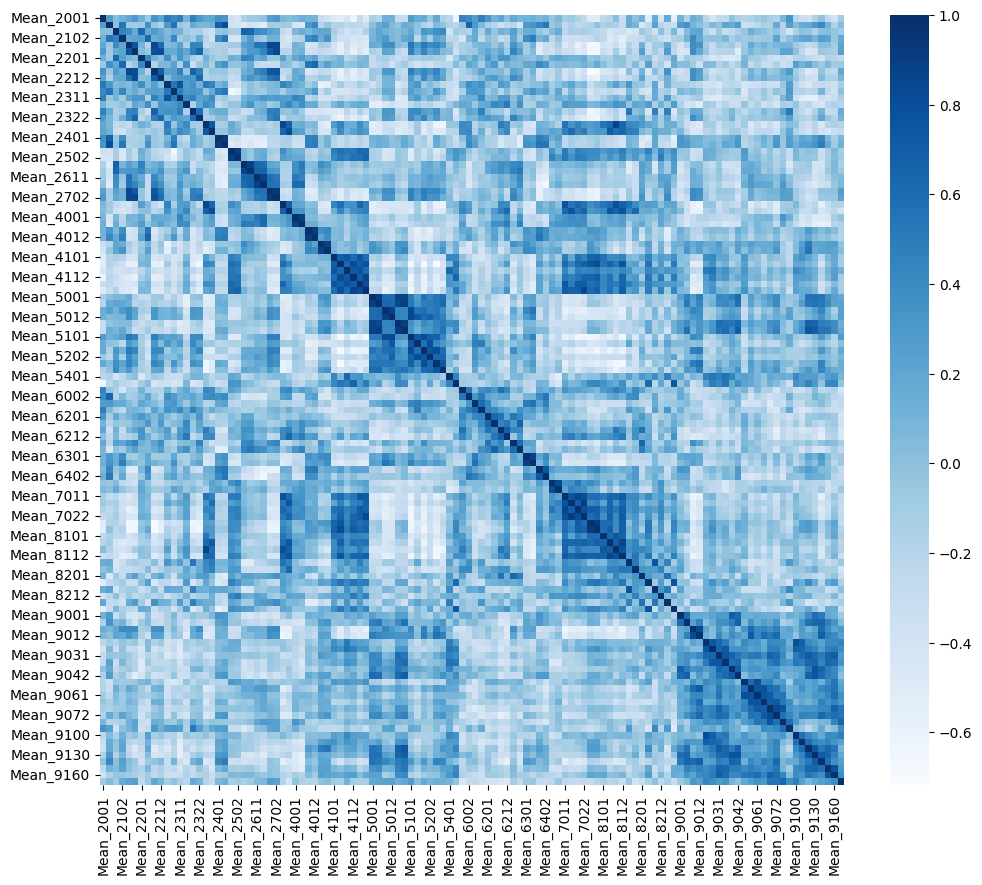

In [7]:
plt.figure(figsize=(12,10))
corr = df_subject_x_region.corr(method='pearson')
sns.heatmap(corr, annot=False, cmap='Blues')
plt.show()

In [8]:
corr_vector = []
for row in range(len(corr.index)):
    for feature in range(len(corr.columns)):
        if row >= feature:
            continue
        corr_vector.append(corr.iloc[row, feature])
corr_vector[:3]

[0.27431794362321765, 0.021196966487146106, 0.10798157067740805]

In [9]:
df_phenotypic = pd.read_csv(phenotypics_filepath, index_col='ScanDir ID')
diagnosis = df_phenotypic['DX'].to_numpy()

In [10]:
df_region_w_dx = df_subject_x_region.copy()

df_region_w_dx['DX'] = diagnosis

df_region_w_dx.head()

,Mean_2001,Mean_2002,Mean_2101,Mean_2102,Mean_2111,Mean_2112,Mean_2201,Mean_2202,Mean_2211,Mean_2212,...,Mean_9082,Mean_9100,Mean_9110,Mean_9120,Mean_9130,Mean_9140,Mean_9150,Mean_9160,Mean_9170,DX
1084283,0.001087,0.006426,0.003046,0.007911,0.002836,0.010834,0.014295,0.013514,0.000804,0.044241,...,0.027268,0.029133,0.005323,-0.006976,-0.010725,-0.018854,-0.017208,-0.021859,0.033943,1
1084884,-0.002832,0.032711,-0.019582,-0.008242,-0.006916,-0.009639,-0.020090,-0.014911,-0.025029,-0.025237,...,-0.013224,-0.051607,0.011342,-0.006839,0.000509,-0.021160,-0.012922,-0.022561,-0.031755,0
1108916,-0.015434,-0.013533,0.006497,-0.003192,0.002811,0.004337,-0.003781,-0.006387,-0.008912,0.004389,...,0.002434,0.018162,-0.022221,-0.020608,-0.010677,-0.022314,0.001143,0.010789,0.010671,1
1206380,-0.001697,0.003231,-0.008367,-0.006932,-0.009974,-0.000491,-0.003736,-0.007092,-0.001125,0.002679,...,0.001607,0.016533,0.000625,0.002733,-0.021268,-0.016480,-0.003075,0.007536,0.013510,3
1340333,-0.007934,0.002444,-0.004535,-0.004931,0.004147,-0.003268,-0.018939,-0.009468,-0.004490,-0.004108,...,-0.007520,0.026861,0.017277,-0.016428,-0.018125,-0.006291,-0.021627,-0.021855,0.040774,1
